In [1]:
import time
import warnings
import matplotlib.pyplot as plt
import sklearn.datasets as ds
import sklearn.model_selection as cv
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import (
    AdaBoostClassifier,
    BaggingClassifier,
    ExtraTreesClassifier,
    RandomForestClassifier,
    VotingClassifier,    
)

%matplotlib inline

In [3]:
# Load dataset
digits = ds.load_digits()
X, y = digits.data, digits.target
(X_train, X_test,  y_train, y_test) = cv.train_test_split(X, y, test_size = .3, random_state = 1)

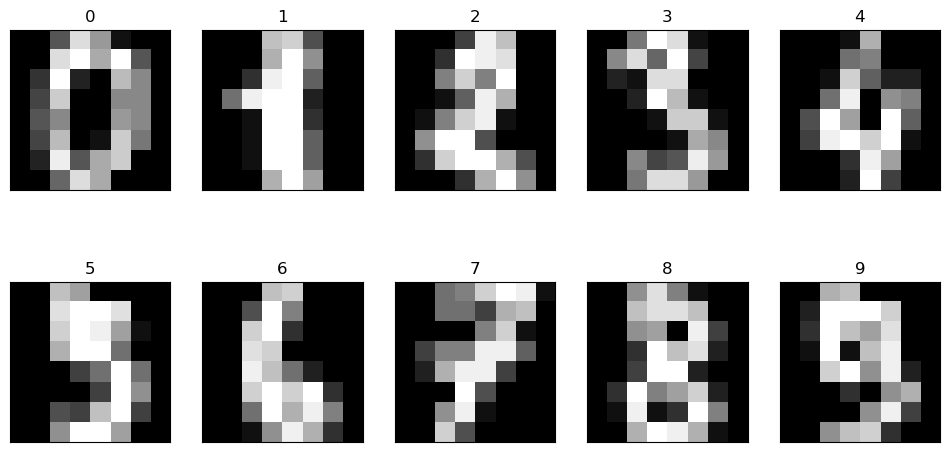

In [5]:
# Plot 1 sample per category
nrows, ncols = 2, 5
plt.figure(figsize=(12,6))
plt.gray()
for i in range(ncols * nrows):
    ax = plt.subplot(nrows, ncols, i + 1)
    ax.matshow(digits.images[i,...])
    plt.xticks([]); plt.yticks([])
    plt.title(digits.target[i])
plt.show()

In [23]:
# Define a function to measure execution's time. It will be use as a 'decorator'
# The idea behind this is just to use it to estimate the time it will take for the
# full code to run if you want to know before training with the complete dataset
# using a subset of size known in relationship with the full dataset.
def compute_executions_time(function):
    def wrapper():
        start_time = time.time()  # init measuring time
        function()  # execute function
        print(f"\n{time.time() - start_time} seconds")  # print execution time
    return wrapper

In [24]:
# Random Forest Classifier: just for you to see the performance of this algorithm that we already
# know and compare it
random_forest_classifier = RandomForestClassifier(
    n_estimators = 100
)

random_forest_classifier.fit(X_train, y_train)
print(f"Random Forest Score (Train): {random_forest_classifier.score(X_train, y_train)}")
print(f"Random Forest Score (Test):  {random_forest_classifier.score(X_test, y_test)}")

Random Forest Score (Train): 1.0
Random Forest Score (Test):  0.9777777777777777


## **Random Forest**

In [21]:
@compute_executions_time
def execute_random_forest_with_different_estimators_and_cv(cv=10):
    for n_trees in [1, 2, 5, 10, 20, 50, 100, 200]:
        random_forest_classifier = RandomForestClassifier(
            n_estimators = n_trees
        )
        scores = cross_val_score(
            estimator = random_forest_classifier,
            X = X,
            y = y,
            cv=cv,
            scoring="accuracy"
        )
        print(f"Accuracy: {scores.mean():.3f} [nº estimators (trees): {n_trees}]")
        
execute_random_forest_with_different_estimators_and_cv();

Accuracy: 0.727 [nº estimators (trees): 1]
Accuracy: 0.736 [nº estimators (trees): 2]
Accuracy: 0.882 [nº estimators (trees): 5]
Accuracy: 0.920 [nº estimators (trees): 10]
Accuracy: 0.934 [nº estimators (trees): 20]
Accuracy: 0.948 [nº estimators (trees): 50]
Accuracy: 0.947 [nº estimators (trees): 100]
Accuracy: 0.951 [nº estimators (trees): 200]

7.017329931259155 seconds


## **Bagging**

In [18]:
## Bagging
lb=[]
for nest in [1, 2, 5, 10, 20, 50, 100, 200]:
    scores = cross_val_score(
        BaggingClassifier(
            estimator = DecisionTreeClassifier(),
            n_estimators = nest
        ), 
        X, 
        y, 
        cv = 10, 
        scoring="accuracy"
    )
    print(f"Accuracy: {scores.mean():.3f} [nº estimators: {nest}]")
    lb.append(scores.mean())

Accuracy: 0.804 [nº estimators: 1]
Accuracy: 0.802 [nº estimators: 2]
Accuracy: 0.872 [nº estimators: 5]
Accuracy: 0.905 [nº estimators: 10]
Accuracy: 0.916 [nº estimators: 20]
Accuracy: 0.921 [nº estimators: 50]
Accuracy: 0.923 [nº estimators: 100]
Accuracy: 0.923 [nº estimators: 200]


In [19]:
lb2=[]
print()
for nest in [1, 2, 5, 10, 20, 50, 100, 200]:
    scores = cross_val_score(
        BaggingClassifier(
            estimator = DecisionTreeClassifier(),
            n_estimators = nest,
            max_features = 0.35
        ), 
        X, 
        y, 
        cv = 10, 
        scoring="accuracy"
    )
    print(f"Accuracy: {scores.mean():.3f} [nº estimators: {nest}]")
    lb2.append(scores.mean())


Accuracy: 0.713 [nº estimators: 1]
Accuracy: 0.698 [nº estimators: 2]
Accuracy: 0.856 [nº estimators: 5]
Accuracy: 0.912 [nº estimators: 10]
Accuracy: 0.938 [nº estimators: 20]
Accuracy: 0.953 [nº estimators: 50]
Accuracy: 0.943 [nº estimators: 100]
Accuracy: 0.949 [nº estimators: 200]


## **Extra Trees Classifier**

In [20]:
@compute_executions_time
def execute_extra_trees_classifier_with_different_estimators_and_cv(cv=10):
    for n_trees in [1, 2, 5, 10, 20, 50, 100, 200]:
        extra_trees_classifier = ExtraTreesClassifier(
            n_estimators = n_trees
        )
        scores = cross_val_score(
            estimator = extra_trees_classifier,
            X = X,
            y = y,
            cv = cv,
            scoring = "accuracy"
        )
        print(f"Accuracy: {scores.mean():.3f} [nº estimators (trees): {n_trees}]")

execute_extra_trees_classifier_with_different_estimators_and_cv()

Accuracy: 0.730 [nº estimators (trees): 1]
Accuracy: 0.758 [nº estimators (trees): 2]
Accuracy: 0.903 [nº estimators (trees): 5]
Accuracy: 0.934 [nº estimators (trees): 10]
Accuracy: 0.949 [nº estimators (trees): 20]
Accuracy: 0.954 [nº estimators (trees): 50]
Accuracy: 0.962 [nº estimators (trees): 100]
Accuracy: 0.965 [nº estimators (trees): 200]

5.273593902587891 seconds


## **Voting Scheme**

In [25]:
@compute_executions_time
def execute_voting_scheme_different_estimators_grid_search_and_cv(cv = 50):
    naive_bayes = GaussianNB()
    k_neighbors = KNeighborsClassifier()
    params_space = {
        "n_neighbors": list(range(1, 30, 2)),
        "weights": ["distance", "uniform"]
    }

    clf = GridSearchCV(
        k_neighbors, 
        param_grid = params_space,
        cv = cv,
        n_jobs = -1
    )
    clf.fit(X, y)
    best_parameters_for_knn = clf.best_params_
    print(f"Best Params fo Knn: {clf.best_params_} - Accuracy: {clf.best_score_}")

    clf2 = KNeighborsClassifier(
        n_neighbors = best_parameters_for_knn["n_neighbors"],
        weights = best_parameters_for_knn["weights"]
    )
    clf3 = DecisionTreeClassifier(criterion="entropy")

    for clf, label in zip([naive_bayes, clf2, clf3], ["Naive Bayes","Knn (3)", "Dec. Tree", ]):
        scores = cross_val_score(
            clf, 
            X, 
            y, 
            cv = cv, 
            scoring = "accuracy"
        )
        print(f"Accuracy: {scores.mean():.3f} [{label}]")

    warnings.filterwarnings("ignore", category=DeprecationWarning)  # Just to avoid warnings

    voting_classifier = VotingClassifier(
        estimators=[
            ("nb", naive_bayes),
            ("knn3", clf2),
            ("dt", clf3)
        ],
        voting = "hard"
    )
    scores = cross_val_score(
        voting_classifier,
        X,
        y,
        cv = cv,
        scoring = "accuracy")
    print("Accuracy: %0.3f [%s]" % (scores.mean() , "Majority Voting"))

execute_voting_scheme_different_estimators_grid_search_and_cv()

Best Params fo Knn: {'n_neighbors': 1, 'weights': 'distance'} - Accuracy: 0.9877619047619046
Accuracy: 0.835 [Naive Bayes]
Accuracy: 0.988 [Knn (3)]
Accuracy: 0.871 [Dec. Tree]
Accuracy: 0.954 [Majority Voting]

3.667026996612549 seconds


## **Ada Boost Classifier**

In [26]:
@compute_executions_time
def execute_ada_boost_classifier_for_different_classifiers(cv=50):
    for n_estimators in [1, 2, 5, 10, 20, 50, 100, 200]:
        ada_boos_classifier = AdaBoostClassifier(
            n_estimators=n_estimators
        )
        scores = cross_val_score(
            ada_boos_classifier,
            X,
            y,
            cv = cv,
            scoring = "accuracy"
        )
        print(f"Accuracy: {scores.mean():.3f} [nº estimators: {n_estimators}]")

execute_ada_boost_classifier_for_different_classifiers()

Accuracy: 0.193 [nº estimators: 1]
Accuracy: 0.260 [nº estimators: 2]
Accuracy: 0.259 [nº estimators: 5]
Accuracy: 0.259 [nº estimators: 10]
Accuracy: 0.259 [nº estimators: 20]
Accuracy: 0.259 [nº estimators: 50]
Accuracy: 0.259 [nº estimators: 100]
Accuracy: 0.259 [nº estimators: 200]

46.8148148059845 seconds
